In [3]:
import pandas as pd
import numpy as np
import scipy.stats

import pandas.plotting

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline
import re
import mailbox
import csv

In [4]:
smoking = pd.read_csv('whickham.csv')

In [5]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
outcome    1314 non-null object
smoker     1314 non-null object
age        1314 non-null int64
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [6]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [7]:
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [8]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [9]:
pd.DataFrame(smoking.outcome.value_counts(normalize=True)) # as fraction of total out

,outcome
Alive,0.719178
Dead,0.280822


In [10]:
bysmoker = smoking.groupby('smoker').outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [12]:
bysmoker.index

MultiIndex(levels=[['No', 'Yes'], ['Alive', 'Dead']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['smoker', 'outcome'])

In [13]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [16]:
# to cast light into the above surprising outcome we use stratification - divide cases into age group using pandas cut
# generate categorical variables based on a set of bins
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64], labels=('0-30','30-40','40-53','53-64'))

In [17]:
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): [0-30 < 30-40 < 40-53 < 53-64]

In [18]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [19]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True) # stratifying the proportion

In [20]:
byage.unstack().drop('Dead', axis=1) # - example of simsons paradox

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

Text(0.5, 1.0, 'smoker')

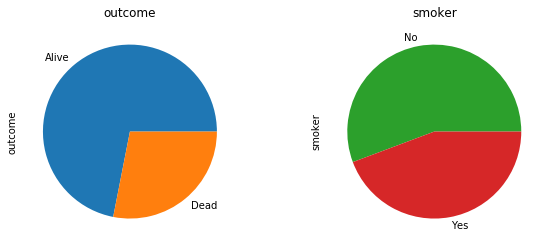

In [32]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie', colors=['C0', 'C1']); pp.title('outcome') # bar, pie, bar
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie', colors=['C2', 'C3']); pp.title('smoker')
#Text(0.5,1,'smoker')

In [33]:
# show outcome by smoker status - just call plot on by smoker
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

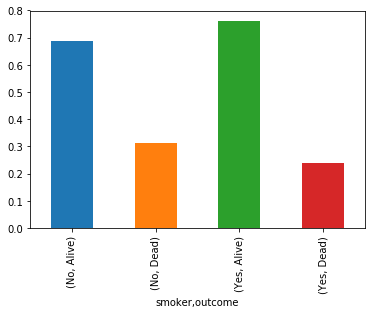

In [34]:
bysmoker.plot(kind='bar')

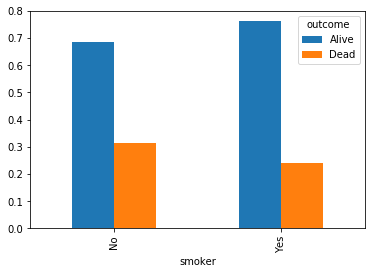

In [35]:
bysmoker.unstack().plot(kind='bar')

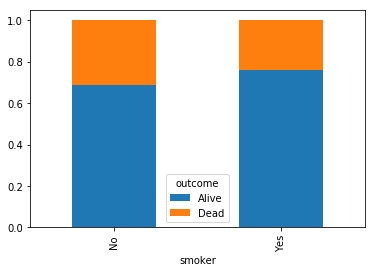

In [36]:
bysmoker.unstack().plot(kind='bar', stacked=True) # this shows that smoking improves the outcome wierd! so lets break it up by age group

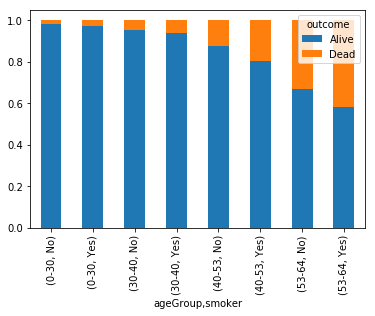

In [37]:
byage.unstack().plot(kind='bar', stacked=True)

In [39]:
byage2 = byage.unstack().drop("Dead", axis=1).unstack()
byage2.columns = ["No", "Yes"]
byage2.columns.name = "smoker"

byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


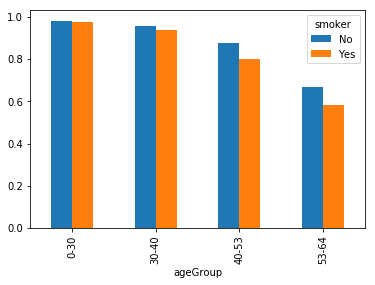

In [40]:
byage2.plot(kind='bar')

In [1]:
# Here we consider a poll vote btw two candidates Brown and Green
 # def sample(brown, n=1000):
#    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

# s = sample(0.51, n=1000)
# s.vote.value_counts(normalize=True)

In [5]:
Grades = [[1], [3.4689], [6.87], [2.02], [1.84], [2], [3.4205],[6.87] , [2.00], [4.0],[8.7], [3], [3.3718], [6.87], [1.97], [4.89]]
colName = ['Grades']

In [6]:
df3 = pd.DataFrame(data = Grades , columns=colName)

In [8]:
df3.count()

Grades    16
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f261b6c6e48>]],
      dtype=object)

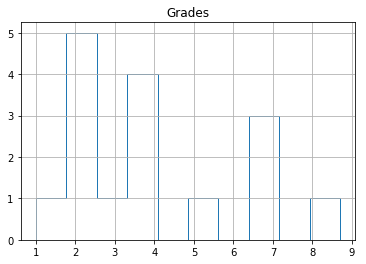

In [10]:
#use a histogram to describe the sample with summary statics
df3.hist(histtype='step')

In [11]:
# The histogram is no recognisable simple form but the mean is 3.8932
df3.describe()

,Grades
count,16.000000
mean,3.893200
std,2.296805
min,1.000000
25%,2.000000
50%,3.396150
75%,5.385000
max,8.700000


In [12]:
# What can we say about the true mean value - we can build a confidence interval by simulating the sample distribution
# We will use BOOTSTRAPPING - estimate the uncertainty of our statistic (the mean) by generating a large family of sample
#...from what we have the characterising the mean over this family (sampling with repalcement)

df3.sample(16, replace=True).describe()
# we see the mean here is slightly different

,Grades
count,16.000000
mean,2.891356
std,1.344943
min,1.000000
25%,2.007500
50%,3.000000
75%,3.420500
max,6.870000


In [14]:
# so we build a bootstrap distribution of means
bootstrap = pd.DataFrame({'meangrade':[df3.sample(100, replace=True).Grades.mean() for i in range(1000)]})

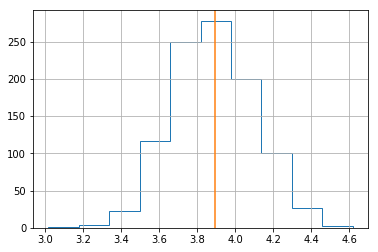

In [16]:
bootstrap.meangrade.hist(histtype='step')
# Now show the actual mean
pp.axvline(df3.Grades.mean(),color='C1')#the mean is same with the bootstrap but there is a significant spread around it

In [18]:
# so lets extract the quartiles - below is approximted 95% CF for the meangrade
# Note the bootstrap requires that the sample is a representative of the entire population
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(3.4834308250000006, 4.311679575)

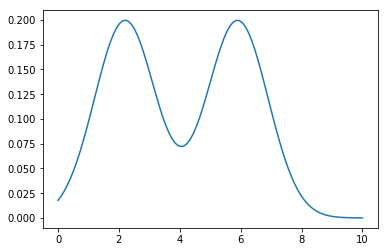

In [19]:
#Testing our CF result using randomly generated (sum of two) normal distribution
n1 = scipy.stats.norm(5.9, 1)
n2 = scipy.stats.norm(2.2, 1)
# for sci.stat object pdf returns the probab density funtion
x = np.linspace (0, 10, 100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

# below shows a truncated bimodal dist

In [20]:
# lets draw a simple grade - 
# rvs returns a random sample from the dist, then choose btw the two which can be done by using a uniformly dist numbers from 0 and 1
def draw():
    while True:
        v  = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [21]:
draw()

1.3636017783800958

In [22]:
# make a data set by calling this repeatedly
def dataset(n=16):
    return pd.DataFrame({'Grades': [draw() for i in range(n)]})

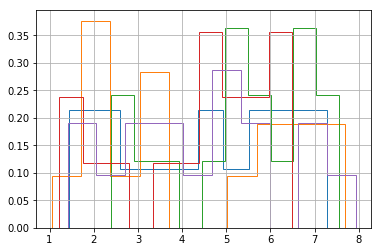

In [25]:
# lets hist a few of this samples
for i in range(5):
    dataset(100).Grades.hist(histtype='step', density=True)

In [28]:
# As for the sampling dist of the mean we can use simulation
means = pd.DataFrame({'meangrade':[dataset(100).Grades.mean() for i in range(1000)]})

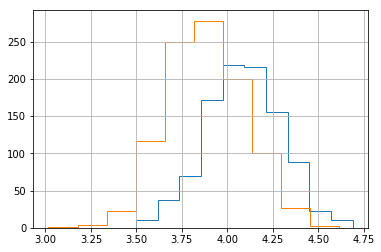

In [34]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

# the true sampling dist is displaced from the bootstrap but the spreads are comparable

## HYPOTHESIS TESTING

In [35]:
pumps = pd.read_csv('pumps.csv') # positions of 8 waterpumps in central London
pumps

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611
5,51.511542,-0.135919,0.051813,-0.199972
6,51.510019,-0.133962,0.187193,-0.369265
7,51.511295,-0.138199,-0.105910,-0.227428


In [37]:
cholera = pd.read_csv('cholera.csv') # number of death and closest pump
cholera.loc[0::20] # shows one record every 20

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


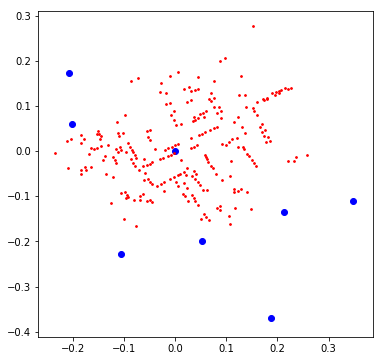

In [38]:
pp.figure(figsize=(6,6))
pp.scatter(pumps.x,pumps.y,color='b')
pp.scatter(cholera.x,cholera.y,color='r',s=3)

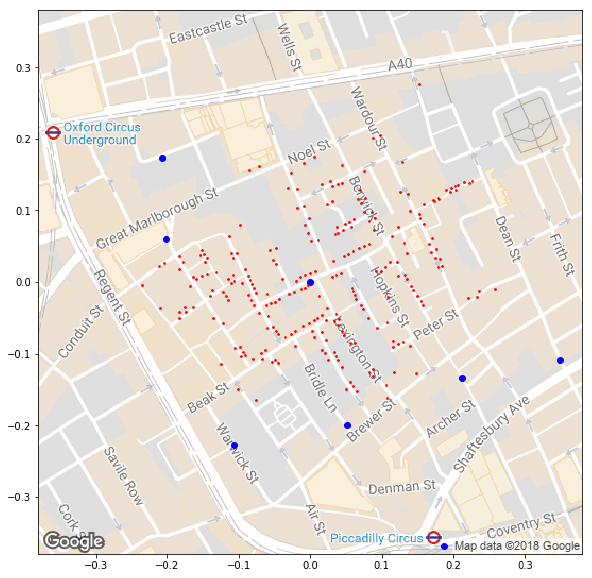

In [39]:
img = matplotlib.image.imread('london.png')
pp.figure(figsize=(10,10))
pp.imshow(img,extent=[-0.38,0.38,-0.38,0.38])
pp.scatter(pumps.x,pumps.y,color='b')
pp.scatter(cholera.x,cholera.y,color='r',s=3)

In [40]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [41]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [42]:
# there maybe more pple leaving in the areas with high death rate - to check this lets simulate
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0,1,4,5],size=n,p=[0.65, 0.15, 0.10, 0.10])}) # p= % of pple living in those areas

In [43]:
simulate(489).closest.value_counts()

0    323
1     68
5     50
4     48
Name: closest, dtype: int64

In [44]:
# sampling dist of the number of deaths in area 0
sampling = pd.DataFrame({'counts':[simulate(489).closest.value_counts()[0] for i in range(10000)]}) # extract count for area 0 repeat 10000 times and enclose in dataframe


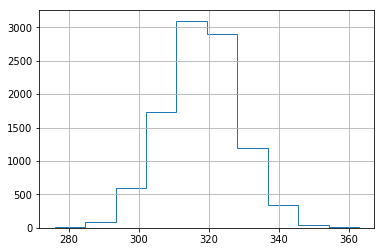

In [45]:
# Note the hypothesis is that the Pumps have nothing to do with cholera & that death is proportional to population
sampling.counts.hist(histtype='step')

In [46]:
# we can now compare this dist with observed 340 deaths in area 0
scipy.stats.percentileofscore(sampling.counts,340)
# 340 is a very extreme value which we will not expect from the null scinario

98.17

In [47]:
100-98.17 # this is the p-value, the smaller it is the more chance we will reject the null hyp

1.8299999999999983

## SECOND EXAMPLE FROM POLL RESULTS

In [49]:
poll = pd.read_csv('poll.csv')

In [50]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [53]:
# The null hyp here is that Green wins or ties the election so the true Brown fraction is < = 0.5
# so we compute the sampling dist of the proportion under a true Brown fraction of 0.50
# if it is lower than that, the p-value will be even lower
# Here's a function to simulate a result of a 1000

def sample(brown, n =1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [54]:
dist = pd.DataFrame({'Brown': [sample(0.5, 1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

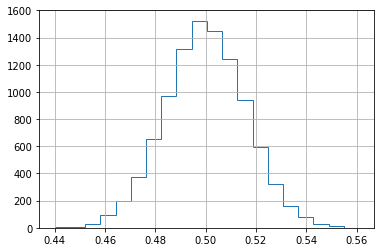

In [55]:
dist.Brown.hist(histtype='step', bins=20) # indeed 0.511 isn't an extreme value from the hist

In [56]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)
# 24 % which is not enough to reject the NULL that Green ties or wins

24.415000000000006

In [57]:
# Here the NULL hypo will be on Brown winning or tieing since Green has the majority
largepoll = pd.read_csv('poll-larger.csv')

In [58]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [59]:
dist = pd.DataFrame({'Green': [sample(0.5, 1000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

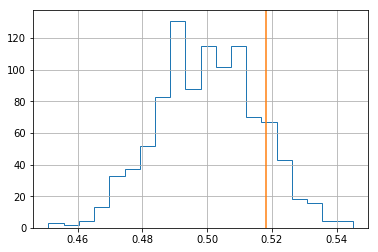

In [60]:
# plot a hist and overlay BROWN's value of 0.5181
dist.Green.hist(histtype='step', bins=20)
pp.axvline(0.5181,c='C1') # the value is extreme

In [61]:
100 - scipy.stats.percentileofscore(dist.Green,0.5181)

12.799999999999997

## STATISCAL MODELLING

In [1]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
gapminder2 = pd.read_csv('gapminder2.csv')
gdata = gapminder2.query('year==1985')
size = 1e-6 * gdata.population
colors = gdata.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})

In [6]:
def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                     s=size, c=colors,
                      linewidths=0.5,edgecolors='k',alpha=0.5)

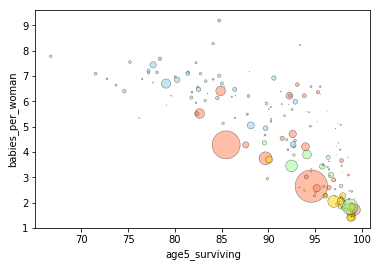

In [7]:
plotdata()

In [8]:
# ols = ordianry least square
# statmodel usage 
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)

In [9]:
# next we fit the model
grandmean = model.fit()

In [10]:
grandmean

In [11]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
              c=colors, s=30,linewidth=0.5,edgecolor='k',marker='D')

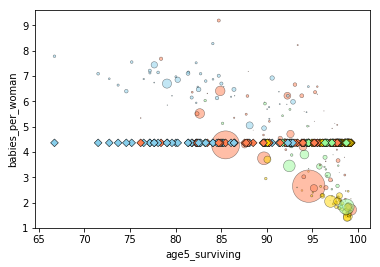

In [12]:
plotfit(grandmean)

In [20]:
grandmean.params

Intercept    4.360714
dtype: float64

In [21]:
gdata.babies_per_woman.mean()

4.360714285714287

In [13]:
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region', data=gdata).fit()

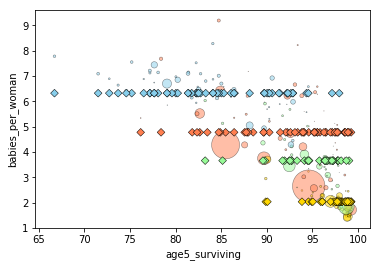

In [14]:
plotfit(groupmeans)

In [24]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [25]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [26]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [27]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [20]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

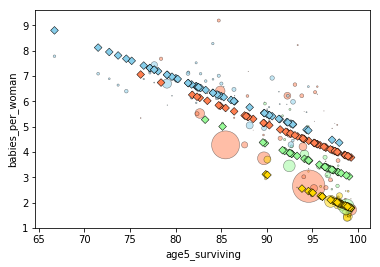

In [21]:
plotfit(surviving)

In [22]:
# we observe that every additional percentage point of child survival to age 5 the number of babies per woman decreases by 0.14
# the constant terms are large bcos theoretically they represent the number of children for survival rate of 0 %
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

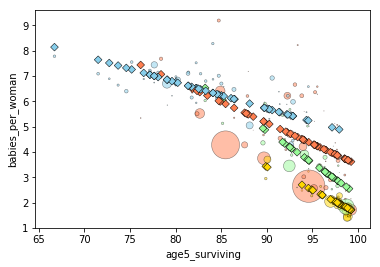

In [31]:
# to add a different slope for every region
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region', data=gdata).fit()
plotfit(surviving_byregion)

In [33]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

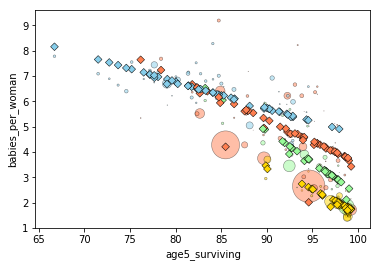

In [15]:
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population', data=gdata).fit()
plotfit(surviving_byregion_population)

## GOODNESS OF FIT

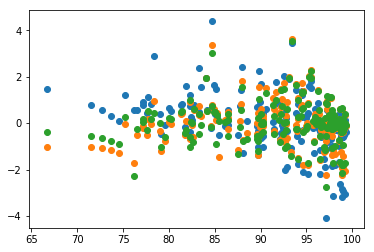

In [23]:
# Plot residuals
pp.scatter(gdata.age5_surviving,groupmeans.resid)
pp.scatter(gdata.age5_surviving,surviving.resid)
pp.scatter(gdata.age5_surviving,surviving_byregion_population.resid)

In [24]:
#we loop over the three models to show the mean sq error
for model in (groupmeans,surviving,surviving_byregion_population):
    print(model.mse_resid)

1.4979520263709154
0.9423025333008321
0.8480227300570361


In [25]:
# show R-sq
for model in (groupmeans,surviving,surviving_byregion_population):
    print(model.rsquared)

0.636467696559659
0.7726009080146058
0.7999775707885208


In [26]:
# F-statistic - meaures how much each param contributes to the growth of the R-sq compared to a random model vector.
# the simple surviving model (150) seems to hit a sweet spot
for model in (groupmeans,surviving,surviving_byregion_population):
    print(model.fvalue)

103.88003937611687
150.3418060343098
86.48787556725138


In [27]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           8.26e-56
Time:                        21:39:59   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#ANOVA
# Residual = number of data points - num of params
sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,466.821946,155.607315,103.880039,6.615470e-39
Residual,178.0,266.635461,1.497952,NaN,NaN


sm.stats.anova_lm(surviving)

In [33]:
sm.stats.anova_lm(surviving_byregion_population) # most complicated model of the three

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN


## CROSS VALIDATION FROM Machine Learning

In [40]:
# Here we devide the data set into training and testing
# Refactored plotting so that it works on arbitrary datasets
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman', c=colors,s=size,linewidth=0.5,edgecolor='k',alpha=0.5)
    
def plotfit(fit,data=gdata):
    plotdata(data)
    
    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),c=colors,s=30,linewidth=0.5,edgecolor='k',marker='D')

In [51]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving' '+ age5_surviving:region - age5_surviving + population')

In [52]:
# To divide up the data we first shuffle 
shuffled = gdata.sample(len(gdata)) # note no replacement this time

In [53]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[:len(gdata)//2:]

In [54]:
# we now fit a model to the  training data
surviving = smf.ols(f_surviving, data=training).fit()

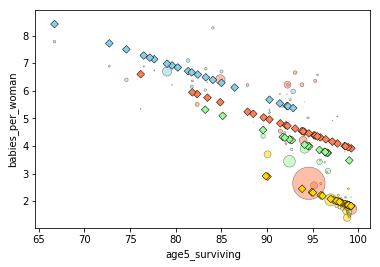

In [55]:
plotfit(surviving, training)

In [56]:
# compute in-sample mse
surviving.mse_resid

0.8075074790213622

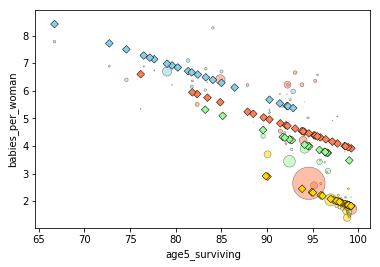

In [61]:
# test data
plotfit(surviving, testing)

In [60]:
# to compute mse for test data
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model - 1
np.sum(resid**2)/df

0.8075074790213622

In [65]:
# Since the results depend on the shuffling and are rather noisy we repeat a few times and take average
def cross_validation(data, formula, response, n=100):
    ret = []
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[:len(gdata)//2:]
        trained = smf.ols(formula, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
        ret.append(mse)
        
    return np.mean(ret)

In [66]:
cross_validation(gdata, f_groupmeans,'babies_per_woman')

1.5530827164404553

In [67]:
cross_validation(gdata, f_surviving,'babies_per_woman')

0.9771702605961748

In [68]:
cross_validation(gdata, f_srp,'babies_per_woman')

0.8366511129228508

## LOGISTIC INFERENCE

In [69]:
# Performing Regression for a categorical response variable.
#fix error in some version of statmodels

import scipy
if not hasattr(scipy.stats, 'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [70]:
smoking = pd.read_csv('whickham2.csv')

In [71]:
smoking = smoking[smoking.age < 65] # removes ages >= 65

In [72]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
4,Alive,No,64
5,Alive,Yes,38
6,Alive,Yes,45


In [92]:
color = np.where(smoking.smoker == 'No','skyblue', 'coral')
jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    pp.scatter(smoking.age, smoking.outcome + jitter, c=color, linewidth=0.2, edgecolor='k', alpha=0.5)
    pp.scatter(smoking.age, fit.predict(smoking), c=color, linewidth=0.2, edgecolor='gray', marker='d')

In [91]:
#smoking['outcome'] = 1+(smoking['outcome'] == 'Alive')
#ols_group_age = smf.ols('outcome - smoker + age', data=smoking).fit()

## BAYESIAN INFERENCE

In [1]:
#import math
#import pymc3 as pm